# Eveline Srinivasan - 10801751

## Research question/interests

### Is there a significant age and gender disparity in the mental health of tech employees?

Many news articles and other forms of media, highlight gender disparities in various metrics such as income, position, representation etc. However, mental health disparities and systemic inequalities are not given equivalent attention. The little focus placed on these topics are often in such broad strokes that they are meaningless in helping enact real changes in the workplace. They often rely on metrics such as job satisfaction or being accepted by coworkers, which highlights inequalities but does not point to a source, or a solution. Therefore, I want to use this dataset, to hopefully determine and also highlight, the more nuanced relationships between gender and mental health within the tech industry.




In [14]:
#Importing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Milestone 2
---
Importing data from file:

In [15]:
# Importing Data 
rawData = pd.read_csv('../data/raw/dataRaw.csv')

## Milestone 3
---
### Task 1: Conduct Exploratory Data Analysis (EDA) on your dataset.

Columns available in the data set along which analysis can be performed:

In [16]:
#Printing columns of Data set.
print(rawData.columns)
len(rawData.columns)


Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


27

These 27 columns can be interpreted by comparing it with the questionnaire provided with the [data source](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey):

1. Timestamp of the individual's survey
2. Age of the individual
3. Gender of the individual
4. Country of origin of the individual
5. US state of origin of the individual if applicable
6. Whether or not the individual is self-employed
7. Whether the individual has a history of mental illness
8. Whether or not the individual has sought treatment for mental health
9. Whether the individual believes their mental health interferes with their work
10. The number of employees at the individual's company
11. Whether the individual works remotely (outside of an office) at least 50% of the time
12. Whether the individual's employer is a primarily tech company
13. Whether the individual's employer provides mental health benefits
14. Whether the individual is aware of their employer's mental health care options
15. Whether the individual's employer has ever discussed a mental health wellness program
16. Whether the individual's employer provides resources on how to seek help for mental health
17. Whether the individual is able to use company resources for mental health anonymously
18. The difficulty of taking mental health leaves at the individual's company
19. Whether the individual thinks discussing mental health with their employer will have negative connotations
20. Whether the individual thinks discussing physical health with their employer will have negative connotations
21. Whether the individual would be willing to discuss mental health with their coworkers
22. Whether the individual would be willing to discuss mental health with their direct supervisor
23. Whether the individual would bring up mental health issues during an interview with a possible employer
24. Whether the individual would bring up physical health issues during an interview with a possible employer
25. Whether the individual believes their employer takes mental health as seriously as physical health
26. Whether the individual has heard of or observed any negative consequences with mental health conditions in their workplace
27.  Any additional comments

### Outcomes of Interest:

1. Whether the individual believes their mental health interferes with their work
1. Whether the individual would be willing to discuss mental health with their coworkers
1. Whether the individual would be willing to discuss mental health with their direct supervisor
1. Whether or not the individual has sought treatment for mental health
1. Whether the individual thinks discussing mental health with their employer will have negative connotations
Particularly in relation to the question of gender. We want to determine if there are disparities between various gender groups.

Since we are only conducting an exploratory analysis see if we can identify patterns of interest within our data within gender and our outcomes independently.

In [17]:
rawData.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

There are a lot of different ways people have written their genders, including misspellings that needs to be addressed. We will address those during the data cleaning phase in Task 2.
However, despite the issues we can get a general idea of the gender distribution in out data.  
Note: Because of the large number of unique responses we are going to ignore all singularly unique responses.

<AxesSubplot: >

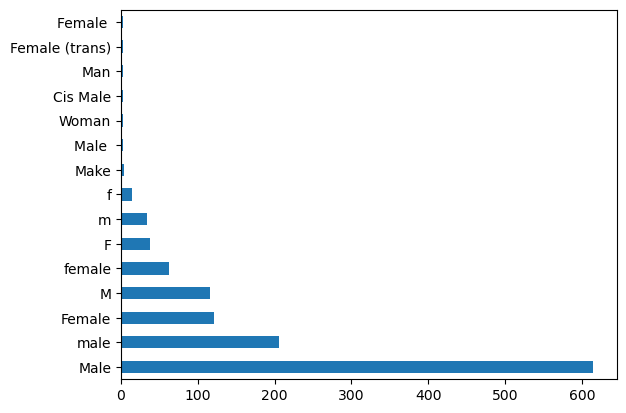

In [18]:
GenderCount = rawData.Gender.value_counts()
GenderCount[GenderCount>1].plot.barh()


Evidently there is a large Male-Bias in the data. Furthermore, Although there are many trans respondents and most of them have unique gender identities that cannot be dealt with individually, So we will address the data on gender data on two fronts: GenderAlignment (Masc Aligned/Femme Aligned/Non-Binary) and GenderType (Cis/Trans). These columns will be generated in Task 2.

Additionally, We need to know the overall pattern in the aspects of our data we are interested in to help our analysis of disparities later on.

<AxesSubplot: >

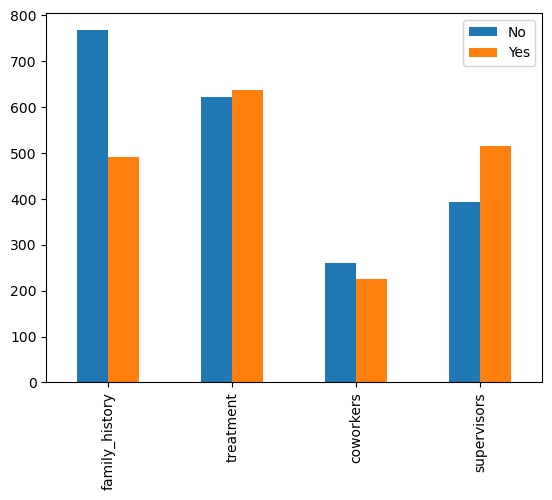

In [19]:
ValueCounts = pd.DataFrame(rawData.family_history.value_counts())
ValueCounts['treatment'] = rawData.treatment.value_counts()
ValueCounts['coworkers'] = rawData.coworkers.value_counts()
ValueCounts['supervisors'] = rawData.supervisor.value_counts()
   
ValueCounts.transpose().plot.bar()

Interesting that more people have had treatment for mental illness than those who have a family history of mental illnesses. Furthermore, we can see an interesting pattern that people are more willing to talk about their mental health with their supervisors than their coworkers.

The next thing to look at is if respondents feel that their mental health has affected their work performance.

<AxesSubplot: >

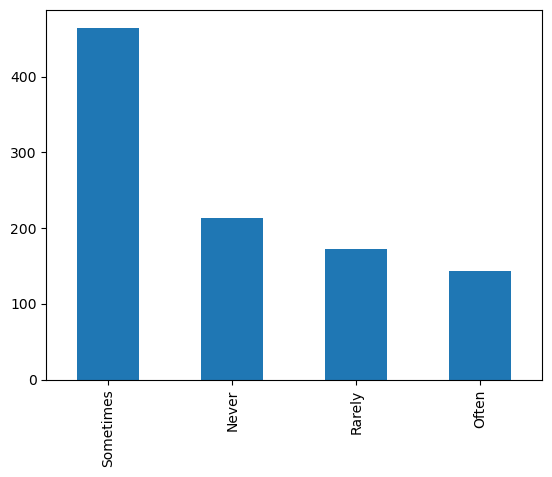

In [20]:
rawData.work_interfere.value_counts().plot.bar()

The vast majority, Roughly over 80% of the respondents feel that mental health has affected their work performance. This validates the need for better mental health support in the tech industry as a whole, irrespective of gender disparities.

Finally, we also want to understand the age distribution of our data to understand the scope of our analysis, even if it proves irrelevant in our conclusions.

<AxesSubplot: xlabel='Age'>

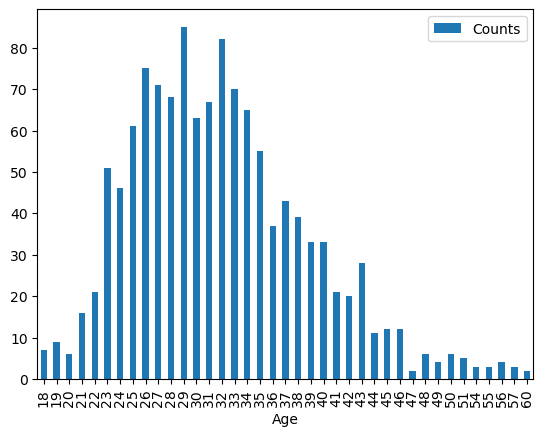

In [21]:
AgeCount = pd.DataFrame(rawData.Age.value_counts()).rename(columns={'Age':'Counts'}).sort_index(axis=0)
AgeCount[AgeCount['Counts']>1].plot.bar(xlabel="Age")

As we can see there is a significant skew towards 25-35 year olds with a sizeable middle-aged population.

### Task 2 : Setting up an "Analysis Pipeline"
---
First we need to load and process the data. 
  1. Remove unused columns
  1. Account for misspelled Gender Data
  1. Remove invalid ages outside the range 18 to 100.
  1. Generate Gender Identity and Type data

In [22]:
rawDF= pd.read_csv('../data/raw/dataRaw.csv') # Loading Raw Data into dataframe

# Removing columns that is not relevant to our analysis
skimmedDF= rawDF[['Age','Gender','work_interfere','coworkers','supervisor','mental_health_consequence','treatment']]

# Dictionary that maps all values of gender to more managable form. 
# Prefix T = Trans/Non Cis ; Gendermarker is based on Masc-Femme Alignment.
# NB is implied trans and neither Masc or Femme. NA is used for junk responses.
genderDict :dict = {'Female':'F','Male':'M','male':'M','M':'M','m':'M','Male-ish':'TM','maile':'M','Trans-female':'TF',
                        'Cis Female':'F','F':'F','something kinda male?':'TM','Cis Male':'M','Woman':'F','f':'F','Mal':'M',
                        'Male (CIS)':'M','queer/she/they':'TF','non-binary':'NB','Femake':'F','woman':'F','Make':'M','Nah':'NA',
                        'All':'NB','Enby':'NB','fluid':'NB','Genderqueer':'NB','Female ':'F','Androgyne':'NB','Agender':'NB',
                        'cis-female/femme':'F','Guy (-ish) ^_^':'TM','male leaning androgynous':'TM','Male ':'M','Man':'M',
                        'Trans woman':'TF','msle':'M','Neuter':'NB','Female (trans)':'TF','queer':'NB','Female (cis)':'F',
                        'Mail':'M','cis male':'M','A little about you':'NA','Malr':'M','p':'NA','femail':'F','Cis Man':'M',
                        'ostensibly male, unsure what that really means':'TM','female':'F'}

#Replacing Gender values according to dictionary
genderDF = skimmedDF.replace({'Gender':genderDict})

#dropping repondants with gender as 'NA' since it is not relevant to our question (3 Entries)
genderDF.drop(genderDF[genderDF['Gender']== 'NA'].index, inplace = True)

#Getting the indexes of Age values that are invalid
invalidAgeList = list(genderDF.loc[(genderDF['Age'].astype('int') < 18) | (genderDF['Age'].astype('int') > 100)].index)

#Replacing Invalid Values with 'NA'
genderDF.loc[invalidAgeList,'Age'] = np.nan

#Rename for clarity
cleanedDF = genderDF

#Now that the data is cleaned up we need to generate the column GenderAlignment and GenderType columns
#List of condtions 
conditions= [(cleanedDF['Gender'] == 'NB'),   
             (cleanedDF['Gender'] == 'TF'),
             (cleanedDF['Gender'] =='TM'),
             (cleanedDF['Gender'] == 'M'),
             (cleanedDF['Gender'] == 'F'),
             (cleanedDF['Gender'] == 'NA')]

#list of corresponding values
gAlignmentValues = ['NBA','FA','MA','MA','FA','NA']
gTypeValues = ['Trans','Trans','Trans','Cis','Cis','NA']

#generating columns using npselect
cleanedDF['gender_alignment'] = np.select(conditions, gAlignmentValues, default='NA')
cleanedDF['gender_type'] = np.select(conditions, gTypeValues, default='NA')

#rename for clarity
processedDF= cleanedDF

#Saving Cleaned Data for ease
processedDF.to_csv('../data/processed/eSrinivasanResearchQuestionData.csv',index=False)

#Printing Data frame to show end Result
processedDF

,Age,Gender,work_interfere,coworkers,supervisor,mental_health_consequence,treatment,gender_alignment,gender_type
0,37.0,F,Often,Some of them,Yes,No,Yes,FA,Cis
1,44.0,M,Rarely,No,No,Maybe,No,MA,Cis
2,32.0,M,Rarely,Yes,Yes,No,No,MA,Cis
3,31.0,M,Often,Some of them,No,Yes,Yes,MA,Cis
4,31.0,M,Never,Some of them,Yes,No,No,MA,Cis
...,...,...,...,...,...,...,...,...,...
1254,26.0,M,NaN,Some of them,Some of them,No,Yes,MA,Cis
1255,32.0,M,Often,Some of them,Yes,No,Yes,MA,Cis
1256,34.0,M,Sometimes,No,No,Yes,Yes,MA,Cis
1257,46.0,F,NaN,No,No,Yes,No,FA,Cis


### Task 3 - Method Chaining and writing Python programs
---


We need to convert our data wrangling steps from the previous Task into method chain functions. 

*Note that some functions return a dataframe to enable method chains but don't use it since there are much simpler or more readable ways of accomplishing our task. E.g. Conditionally replacing values and generating new columns*

In [23]:
def genderAdjust(rawDF):
    #dictionary that serves as lookup table for gender_alignment
    genderDict :dict = {'Female':'F','Male':'M','male':'M','M':'M','m':'M','Male-ish':'TM','maile':'M','Trans-female':'TF',
                        'Cis Female':'F','F':'F','something kinda male?':'TM','Cis Male':'M','Woman':'F','f':'F','Mal':'M',
                        'Male (CIS)':'M','queer/she/they':'TF','non-binary':'NB','Femake':'F','woman':'F','Make':'M','Nah':'NA',
                        'All':'NB','Enby':'NB','fluid':'NB','Genderqueer':'NB','Female ':'F','Androgyne':'NB','Agender':'NB',
                        'cis-female/femme':'F','Guy (-ish) ^_^':'TM','male leaning androgynous':'TM','Male ':'M','Man':'M',
                        'Trans woman':'TF','msle':'M','Neuter':'NB','Female (trans)':'TF','queer':'NB','Female (cis)':'F',
                        'Mail':'M','cis male':'M','A little about you':'NA','Malr':'M','p':'NA','femail':'F','Cis Man':'M',
                        'ostensibly male, unsure what that really means':'TM','female':'F'}

    finalDF = (rawDF
        .replace({'Gender':genderDict})    #Replaces the gender values according to dictionary
        .drop(rawDF[rawDF['Gender']== 'NA'].index)   #dropping repondants with gender as 'NA' since it is not relevant to our question (3 Entries)
    )
    
    return finalDF

def ageAdjust(InputDF):
    
    #getting indexes of rows that do not lie within valid age range
    invalidAgeList = list(InputDF.loc[(InputDF['Age'] < 18) | (InputDF['Age'] > 100)].index)
    #replacing invalid values with NaN
    InputDF.loc[invalidAgeList,'Age'] = np.nan
    return InputDF

def generateColumns(InputDF):    
    
    #List of condtions 
    conditions= [(InputDF['Gender'] == 'NB'),   
                (InputDF['Gender'] == 'TF'),
                (InputDF['Gender'] =='TM'),
                (InputDF['Gender'] == 'M'),
                (InputDF['Gender'] == 'F'),
                (InputDF['Gender'] == 'NA')]
    
    #list of corresponding values
    gAlignmentValues = ['NBA','FA','MA','MA','FA','NA']
    gTypeValues = ['Trans','Trans','Trans','Cis','Cis','NA']
    
    #generating columns using npselect
    InputDF['gender_alignment'] = np.select(conditions, gAlignmentValues, default='NA')
    InputDF['gender_type'] = np.select(conditions, gTypeValues, default='NA')
    
    return InputDF
    

def load_and_process(filePath :str):  
    rawDF=pd.read_csv(filePath)  #Loading Raw Data
    skimmedDF= rawDF[['Age','Gender','work_interfere','coworkers','supervisor','mental_health_consequence','treatment']] #Removing unneccesary columns
    
    finalDF =(
        skimmedDF
        .pipe(genderAdjust)
        .pipe(ageAdjust)
        .pipe(generateColumns)
    )
    return finalDF


finalDF = load_and_process('../data/raw/dataRaw.csv')

finalDF

,Age,Gender,work_interfere,coworkers,supervisor,mental_health_consequence,treatment,gender_alignment,gender_type
0,37.0,F,Often,Some of them,Yes,No,Yes,FA,Cis
1,44.0,M,Rarely,No,No,Maybe,No,MA,Cis
2,32.0,M,Rarely,Yes,Yes,No,No,MA,Cis
3,31.0,M,Often,Some of them,No,Yes,Yes,MA,Cis
4,31.0,M,Never,Some of them,Yes,No,No,MA,Cis
...,...,...,...,...,...,...,...,...,...
1254,26.0,M,NaN,Some of them,Some of them,No,Yes,MA,Cis
1255,32.0,M,Often,Some of them,Yes,No,Yes,MA,Cis
1256,34.0,M,Sometimes,No,No,Yes,Yes,MA,Cis
1257,46.0,F,NaN,No,No,Yes,No,FA,Cis


Since the data is going to be grouped along the gender_alignment and gender_type variables, and also need it to be normalized for sample bias it would be prudent to define a function that plots the percentage of each group that corresponds to a particular value in a column. The function is countNormalizedPlot.   

It is defined is as follows:  

In [24]:
def countNormalizedPlot (df,x,y):
    (df.groupby(x)[y]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sns.catplot,'data'), x=y,y='percent',hue=x,kind='bar'))
    return


### Task 4: Perform Data Analysis
---
Creating a dataframe that's best for Eveline's research question, is there a significant age and gender disparity in the mental health of tech employees?

 To begin, we import the data were going to be working on and required libraries:

In [29]:
import project_functions3 as p3

df3 = pd.read_csv('../data/processed/eSrinivasanResearchQuestionData.csv')
df3

,Age,Gender,work_interfere,coworkers,supervisor,mental_health_consequence,treatment,gender_alignment,gender_type
0,37.0,F,Often,Some of them,Yes,No,Yes,FA,Cis
1,44.0,M,Rarely,No,No,Maybe,No,MA,Cis
2,32.0,M,Rarely,Yes,Yes,No,No,MA,Cis
3,31.0,M,Often,Some of them,No,Yes,Yes,MA,Cis
4,31.0,M,Never,Some of them,Yes,No,No,MA,Cis
...,...,...,...,...,...,...,...,...,...
1251,26.0,M,NaN,Some of them,Some of them,No,Yes,MA,Cis
1252,32.0,M,Often,Some of them,Yes,No,Yes,MA,Cis
1253,34.0,M,Sometimes,No,No,Yes,Yes,MA,Cis
1254,46.0,F,NaN,No,No,Yes,No,FA,Cis


Before we begin our analysis we need to get an idea of the sample sizes of each group so that we can understand how statistically valid our data on each of the groups is:

<AxesSubplot: xlabel='Gender Type'>

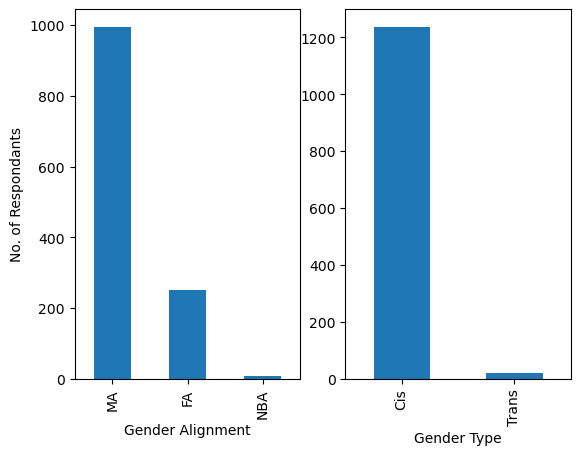

In [30]:
plt.subplot(1,2,1)
plt.xlabel('Gender Alignment')
plt.ylabel('No. of Respondants')
df3.gender_alignment.value_counts().plot.bar()

plt.subplot(1,2,2)
plt.xlabel('Gender Type')
df3.gender_type.value_counts().plot.bar()

As we can see, the number of respondents who identified as Trans is not statistically representative (19 Respondents). Additionally, The number of Non-Binary Aligned individuals are also not a statistically representative sample(9 Respondents). However, for the sake of inclusivity, transparency and thoroughness we will continue to include these groups in our analysis moving forward.

*Sidenote: We have assigned people who are non-binary but express a preference, e.g 'she/they queer' a gender alignment according to their preference. In reality these individuals may identify as Non-Binary Aligned instead. This reflects a greater need for data collection systems that more accurately reflect their gender experience in general. Asking people if they identify as trans and their alignment if any in addition to their gender as a write-in field is suggested*

To begin, let us get an understanding of the gender disparities in the outcomes that we are interested in, starting with whether individuals feel impacted by their mental health in their work life.

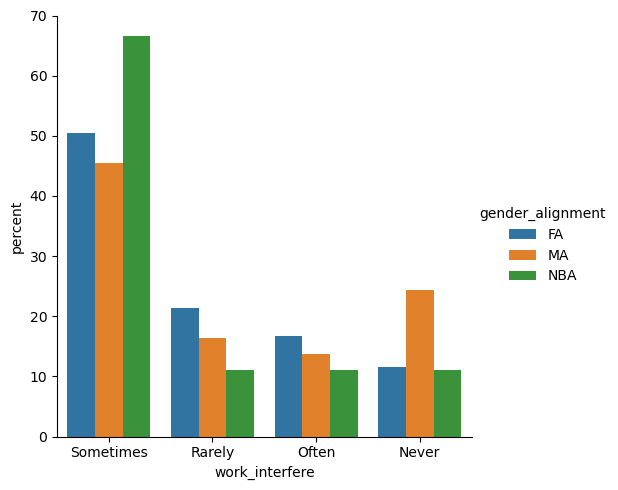

In [31]:
p3.countNormalizedPlot(df3,'gender_alignment','work_interfere')

As expected, Almost across the board, femme-aligned individuals are more likely to say that their mental health affects their work performance. Additionally, note that almost twice as many masculine people as femme-aligned individuals say that their mental health Never affects their work performance.

The next metrics we want to look at are the disparities in willingness to discuss their mental health with coworkers and supervisors.

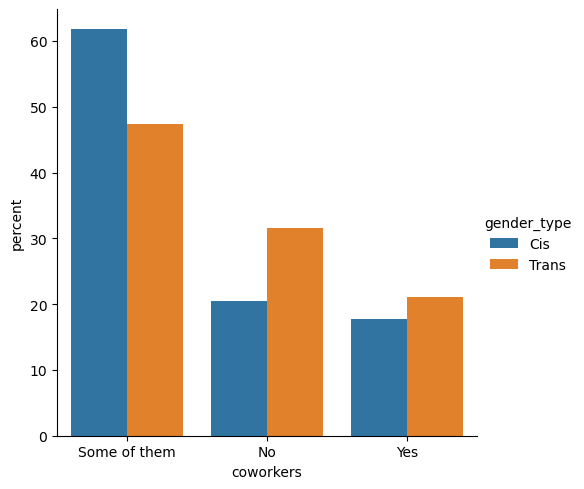

In [32]:
p3.countNormalizedPlot(df3,'gender_type','coworkers')

Furthermore, there is a clear divide between cis and trans individuals, with trans individuals significantly likely to say not talk about their mental health with coworkers.

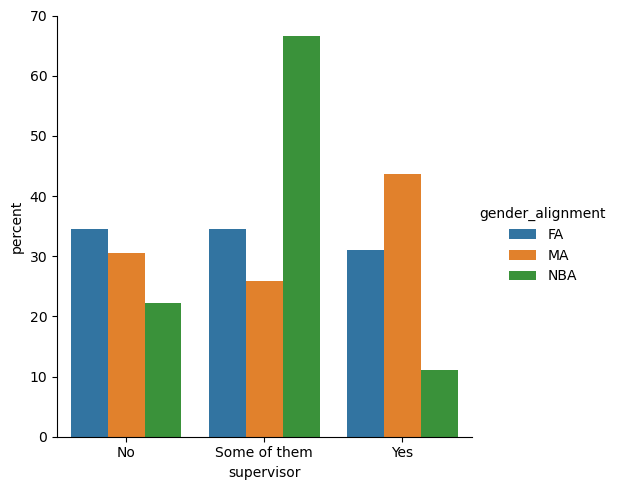

In [33]:
p3.countNormalizedPlot(df3,'gender_alignment','supervisor')

A similar and stronger pattern is observed when we look at the likelihood of talking to their direct supervisors. Femme-aligned people are significantly less likely to talk to their supervisor about their mental health and when they do are also significantly likely to be more selective.

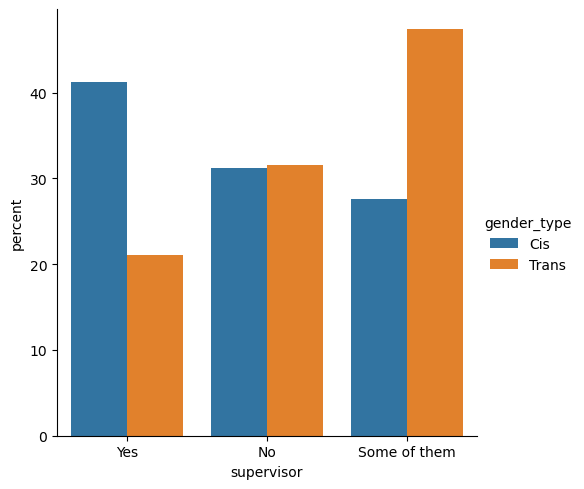

In [34]:
p3.countNormalizedPlot(df3,'gender_type','supervisor')

The pattern is even stronger when we separate the data by gender type. Trans individuals are significantly more selective than cis people reflecting a need for more inclusive management structures in the tech industry. 

Since the pattern is so strong, it might be interesting to look at the gender disparity on whether the individual thinks discussing mental health with their employer will have negative connotations.

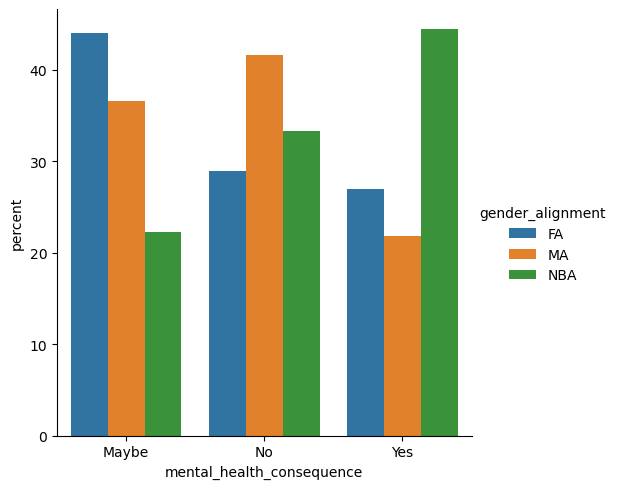

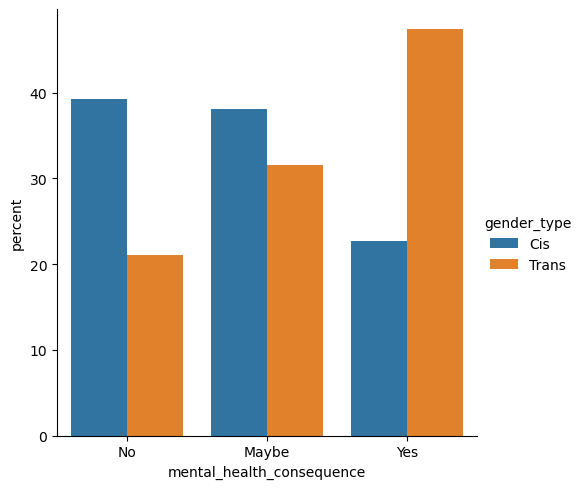

In [35]:
p3.countNormalizedPlot(df3,'gender_alignment','mental_health_consequence')
p3.countNormalizedPlot(df3,'gender_type','mental_health_consequence')

As expected the pattern inferred from the data above is held regarding the expectations in consequences of bringing up mental health with their employers. Femme-aligned individuals are far more likely to expect consequence and are also significantly more unsure of the likelihood of consequence than masc aligned individuals. There is also an extremely strong expectation of consequences among non-binary individuals and additionally, that pattern carries forward to out gender type analysis. Trans people are more than twice as likely to expect strong consequence for bringing up mental health with their employer.

If we look at more nuanced data by looking at gender directly instead of aggregating it:

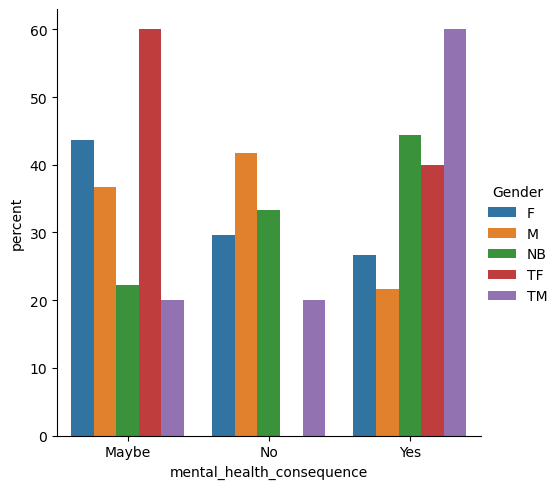

In [36]:
p3.countNormalizedPlot(df3,'Gender','mental_health_consequence')

We see that ALL Trans and femme aligned individuals are either unsure or expect consequences for discussing mental health. This reflects a strong presence of trans-misogyny in tech spaces.

Finally, as a sanity check we corroborate our findings by looking at disparity in use of mental health resources.

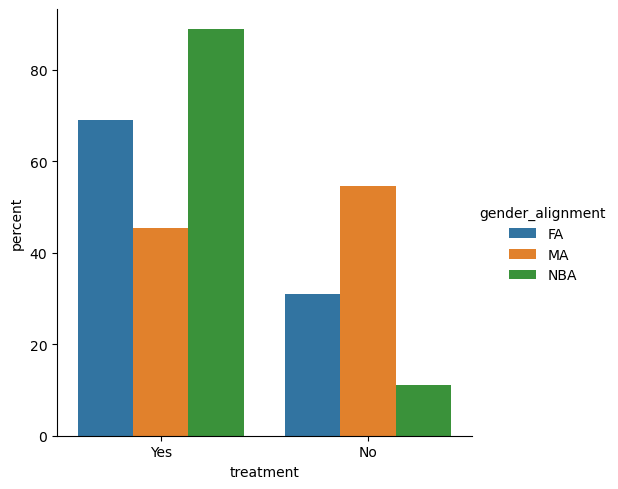

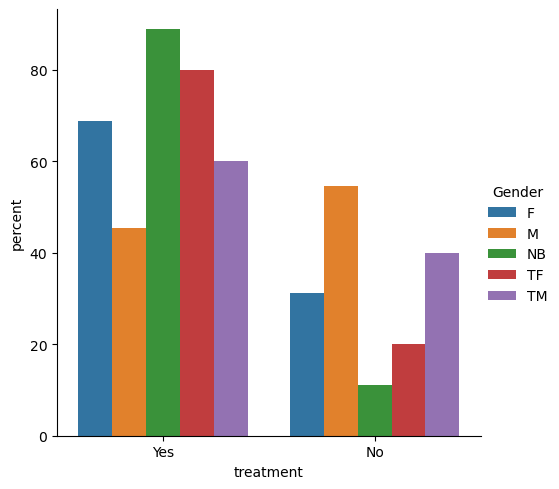

In [37]:
p3.countNormalizedPlot(df3,'gender_alignment','treatment')
p3.countNormalizedPlot(df3,'Gender','treatment')

As we can see the patterns are held with individuals use of mental health resource with femme individuals are more likely to have sought treatment for their mental health. An interesting point of note is also that masc-aligned trans people far less likely to have sought treatment than femme-aligned trans people. Unfortunately we cannot determine whether this is a reflection of toxic-masculinity or trans-misogyny. It is likely a combination of both factors, and is worth investigating.

#### Conclusion
 The findings suggest that the tech industry is significantly biased against femme-aligned and trans-individuals. Additionally, the worst outcomes are reflected among trans-femme individuals reflecting a pervasive trans-misogyny issue. Furthermore, we see that power dynamics play a big part, those in supervisory roles or in other positions of power need to do a better job of making tech spaces more inclusive towards trans and femme-aligned individuals while also creating fairer and more inclusive systems within tech.  

## Milestone 4
---